# Tomato disease detection

### Mount GDrive

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### Setup

Install required libraries

In [ ]:
# !pip install ultralytics==8.0.20
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.0/722.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
!pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 53.4 MB/s eta 0:00:00


Import required libraries

In [ ]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [ ]:
import os
import glob

from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
EXPERIMENTS_FOLDER = "/content/drive/MyDrive/tomato-disease-detection"

DATASET_FOLDER = f"{EXPERIMENTS_FOLDER}/datasets/TomatoDiseaseDetectionEurope-1"

os.makedirs(DATASET_FOLDER, exist_ok=True)

MODEL_NAME_TO_USE = "yolov8n"
MODEL_TO_USE = f"{MODEL_NAME_TO_USE}.pt"

RUNS_FOLDER = "runs/tomato_diseases_detect"
EXPERIMENT_NAME = f"BASE_COCO_FullData_{MODEL_NAME_TO_USE}_80_epochs"

#
TRAIN_EXPERIMENT_NAME = f"{EXPERIMENT_NAME}/train"
TRAINED_MODEL_PATH = f"{DATASET_FOLDER}/{RUNS_FOLDER}/{TRAIN_EXPERIMENT_NAME}/weights/best.pt"

#
VAL_EXPERIMENT_NAME = f"{EXPERIMENT_NAME}/val"
TEST_EXPERIMENT_NAME = f"{EXPERIMENT_NAME}/test"

# Define variables to the experiment folders where predictions will be stored
INFERENCE_TRAIN_EXPERIMENT_NAME = f"{TRAIN_EXPERIMENT_NAME}_predict"
INFERENCE_VAL_EXPERIMENT_NAME = f"{VAL_EXPERIMENT_NAME}_predict"
INFERENCE_TEST_EXPERIMENT_NAME = f"{TEST_EXPERIMENT_NAME}_predict"

# Define path variables to predicted images that you saved
TRAIN_PREDICTIONS_PATH = f"{DATASET_FOLDER}/{RUNS_FOLDER}/{INFERENCE_TRAIN_EXPERIMENT_NAME}"
VAL_PREDICTIONS_PATH = f"{DATASET_FOLDER}/{RUNS_FOLDER}/{INFERENCE_VAL_EXPERIMENT_NAME}"
TEST_PREDICTIONS_PATH = f"{DATASET_FOLDER}/{RUNS_FOLDER}/{INFERENCE_TEST_EXPERIMENT_NAME}"

# Define format and path for model export
FORMAT = "onnx"
EXPORT_EXPERIMENT_NAME = f"{EXPERIMENT_NAME}/{FORMAT}"


# Define number of epochs for training and image size
EPOCHS = 80
IMAGE_SIZE = 640

Check your GPU

In [ ]:
!nvidia-smi

Fri Mar 22 10:56:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 💻 CLI

In [ ]:
%cd "{DATASET_FOLDER}"

!curl -L "https://app.roboflow.com/ds/f6qiFJJ2lb?key=6tJ3r0xyNr" > roboflow.zip; unzip -n roboflow.zip;

Streaming output truncated to the last 5000 lines.
 extracting: train/images/collage_78_jpg.rf.6d89f00ce1b1dbb5692e58ab5de19616.jpg  
 extracting: train/images/collage_790_jpg.rf.604cb6b0435cb62907183bd002c66110.jpg  
 extracting: train/images/collage_791_jpg.rf.0e0804836c2e475ee87430d0b31adb9c.jpg  
 extracting: train/images/collage_792_jpg.rf.a3b00bc6a0ecba7abb01fb129fb7d680.jpg  
 extracting: train/images/collage_793_jpg.rf.19a5e4d57b19e682e19e3e59d4ea9715.jpg  
 extracting: train/images/collage_794_jpg.rf.0d88d11ca86330dccb46787cf7013de9.jpg  
 extracting: train/images/collage_795_jpg.rf.7aa42d90367f7895b1f7ec98f5bd73e4.jpg  
 extracting: train/images/collage_797_jpg.rf.f9f96ac5a1fcfc5cb86967d66d7c5215.jpg  
 extracting: train/images/collage_798_jpg.rf.aa0a26f1f6f371b628753b9b19910021.jpg  
 extracting: train/images/collage_799_jpg.rf.076f75882a9a258bf3a17c7c41b924ad.jpg  
 extracting: train/images/collage_7_jpg.rf.73c2bd093affa46d7789d19e19c77a71.jpg  
 extracting: train/images/co

### Train YOLOv8

Train the model and evaluate its performance metrics on train subset to gain insights into its effectiveness

In [ ]:
%cd {DATASET_FOLDER}

!yolo task=detect mode=train model="{MODEL_TO_USE}" data="{DATASET_FOLDER}/data.yaml" epochs="{EPOCHS}" imgsz="{IMAGE_SIZE}" plots=True project="{RUNS_FOLDER}" name="{TRAIN_EXPERIMENT_NAME}"

/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1
100% 6.23M/6.23M [00:00<00:00, 125MB/s]
Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/tomato_diseases_detect, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=Fal

### Calculate metrics for validation and test subsets

Assess metrics on `val` subset

In [ ]:
%cd {DATASET_FOLDER}

!yolo task=detect mode=val model="{TRAINED_MODEL_PATH}" data="{DATASET_FOLDER}/data.yaml" project="{RUNS_FOLDER}"  name="{VAL_EXPERIMENT_NAME}"

/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1
Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/valid/labels.cache... 633 images, 0 backgrounds, 0 corrupt: 100% 633/633 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 40/40 [00:17<00:00,  2.31it/s]
                   all        633       1762      0.927      0.875       0.95      0.858
          Early Blight        633        164      0.931      0.899      0.962      0.867
               Healthy        633        261      0.898      0.881      0.933      0.835
           Late Blight        633        176      0.939      0.881      0.971      0.894
            Leaf Miner        633        176      0.928      0.983      

Assess metrics on `test` subset

In [ ]:
%cd {DATASET_FOLDER}

!yolo task=detect mode=val model="{TRAINED_MODEL_PATH}" data="{DATASET_FOLDER}/test_data.yaml" project="{RUNS_FOLDER}" name="{TEST_EXPERIMENT_NAME}"

/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1
Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/test/labels... 400 images, 0 backgrounds, 0 corrupt: 100% 400/400 [00:05<00:00, 79.67it/s] 
val: New cache created: /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:11<00:00,  2.18it/s]
                   all        400       1558      0.987       0.95      0.986       0.95
          Early Blight        400        162      0.974      0.932      0.987      0.953
               Healthy        400         88      0.987      0.854      0.958      0.889
           Late Blight       

In [ ]:
%cd {DATASET_FOLDER}

!yolo task=detect mode=val model="{TRAINED_MODEL_PATH}" data="{DATASET_FOLDER}/test_data.yaml" project="{RUNS_FOLDER}" name="{TEST_EXPERIMENT_NAME}"

### Visualize metrics

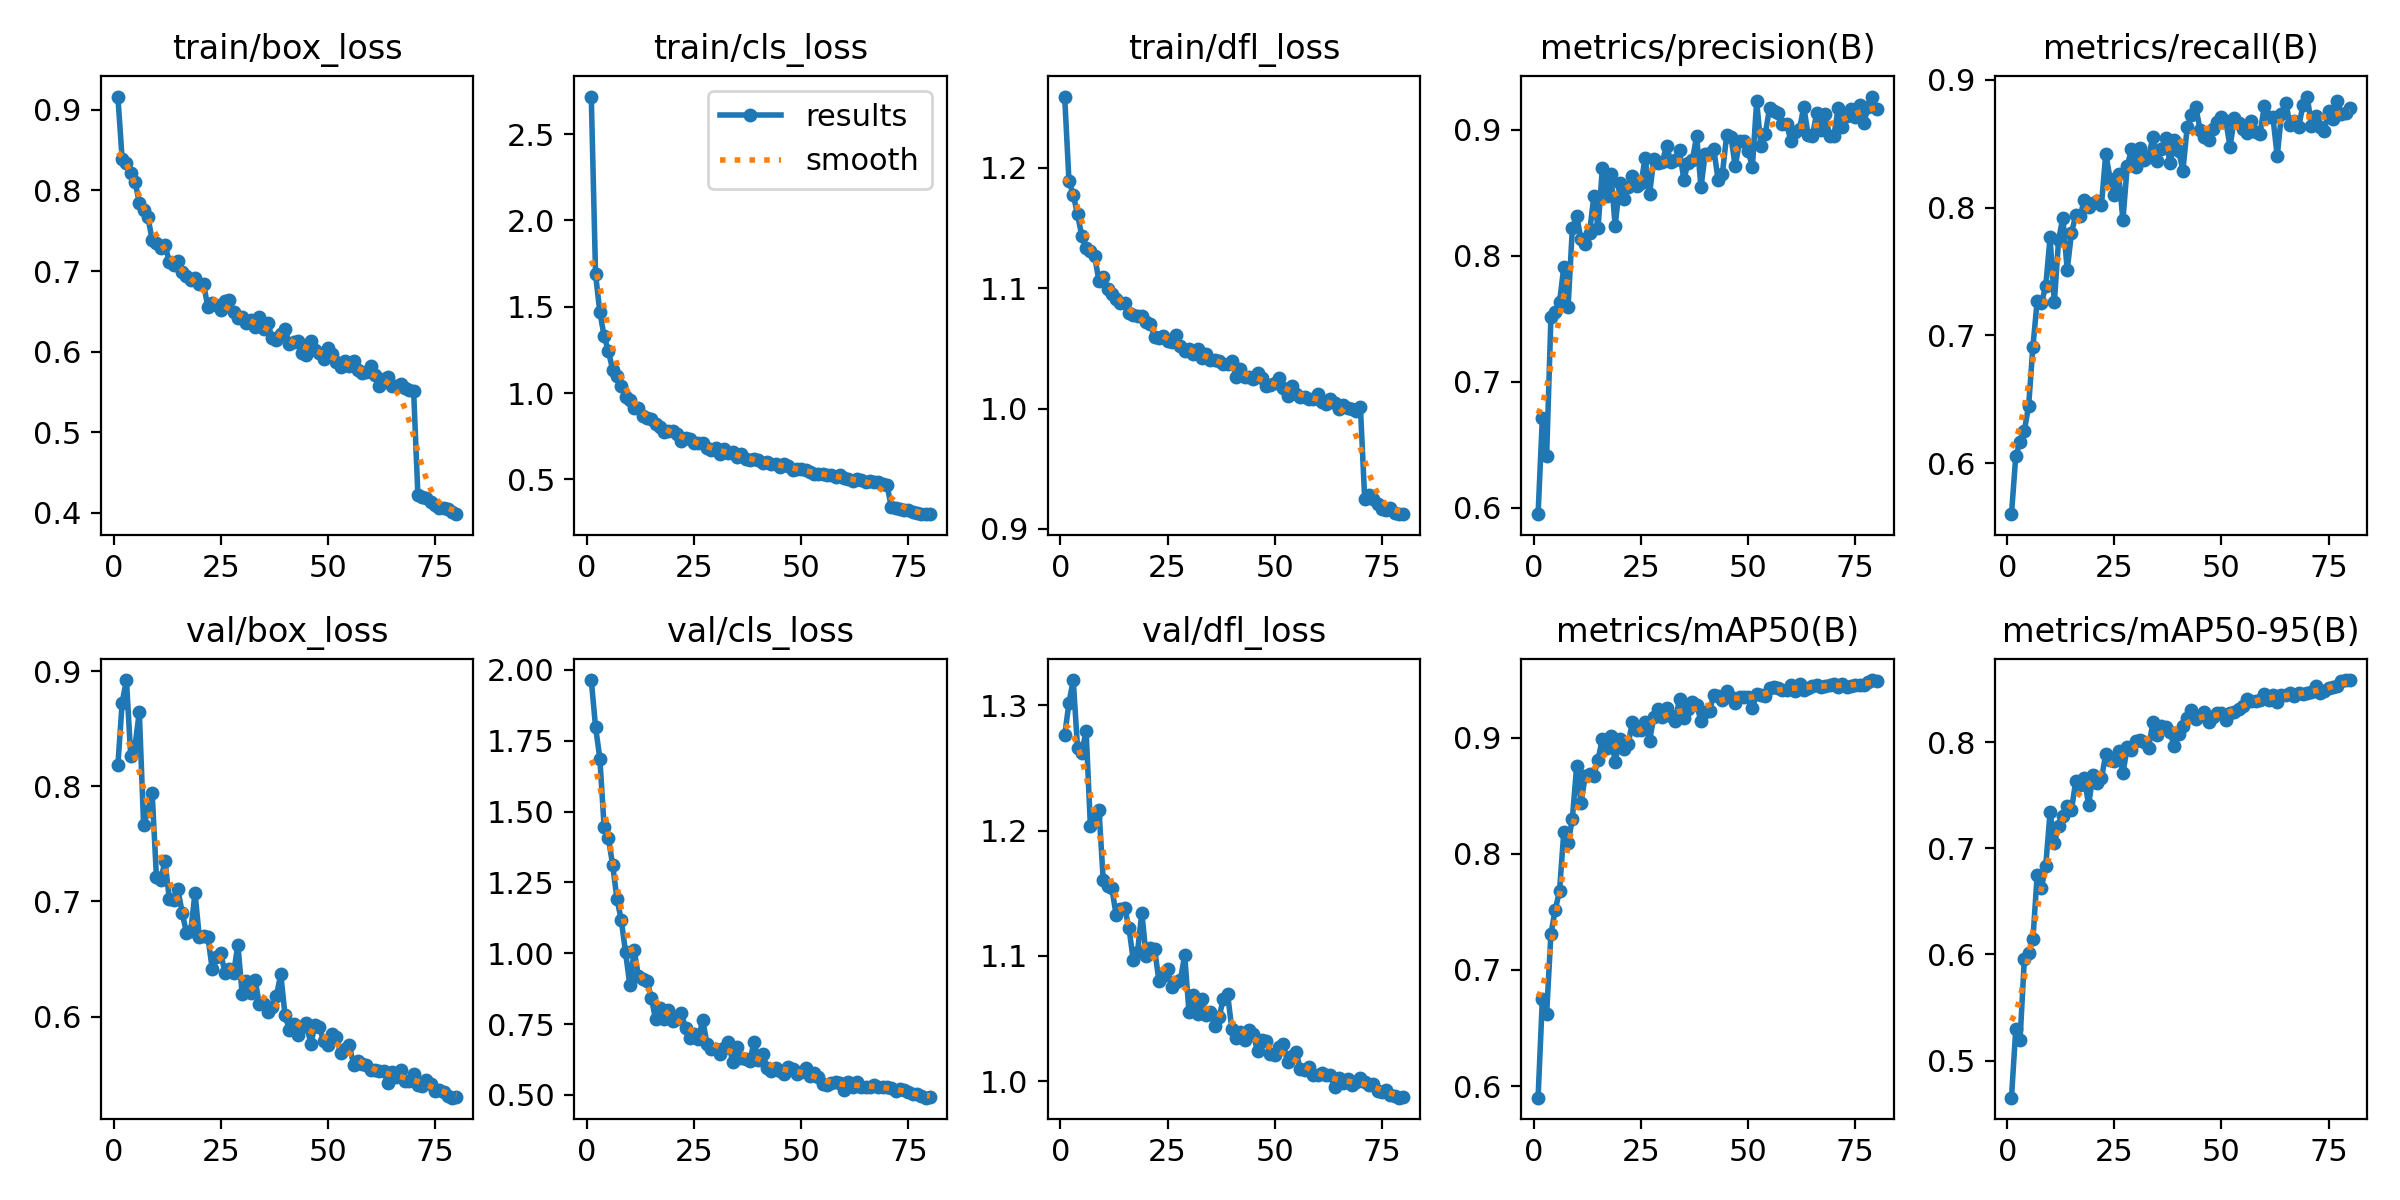

In [ ]:
Image(filename=f"{DATASET_FOLDER}/{RUNS_FOLDER}/{TRAIN_EXPERIMENT_NAME}/results.png", width=600)

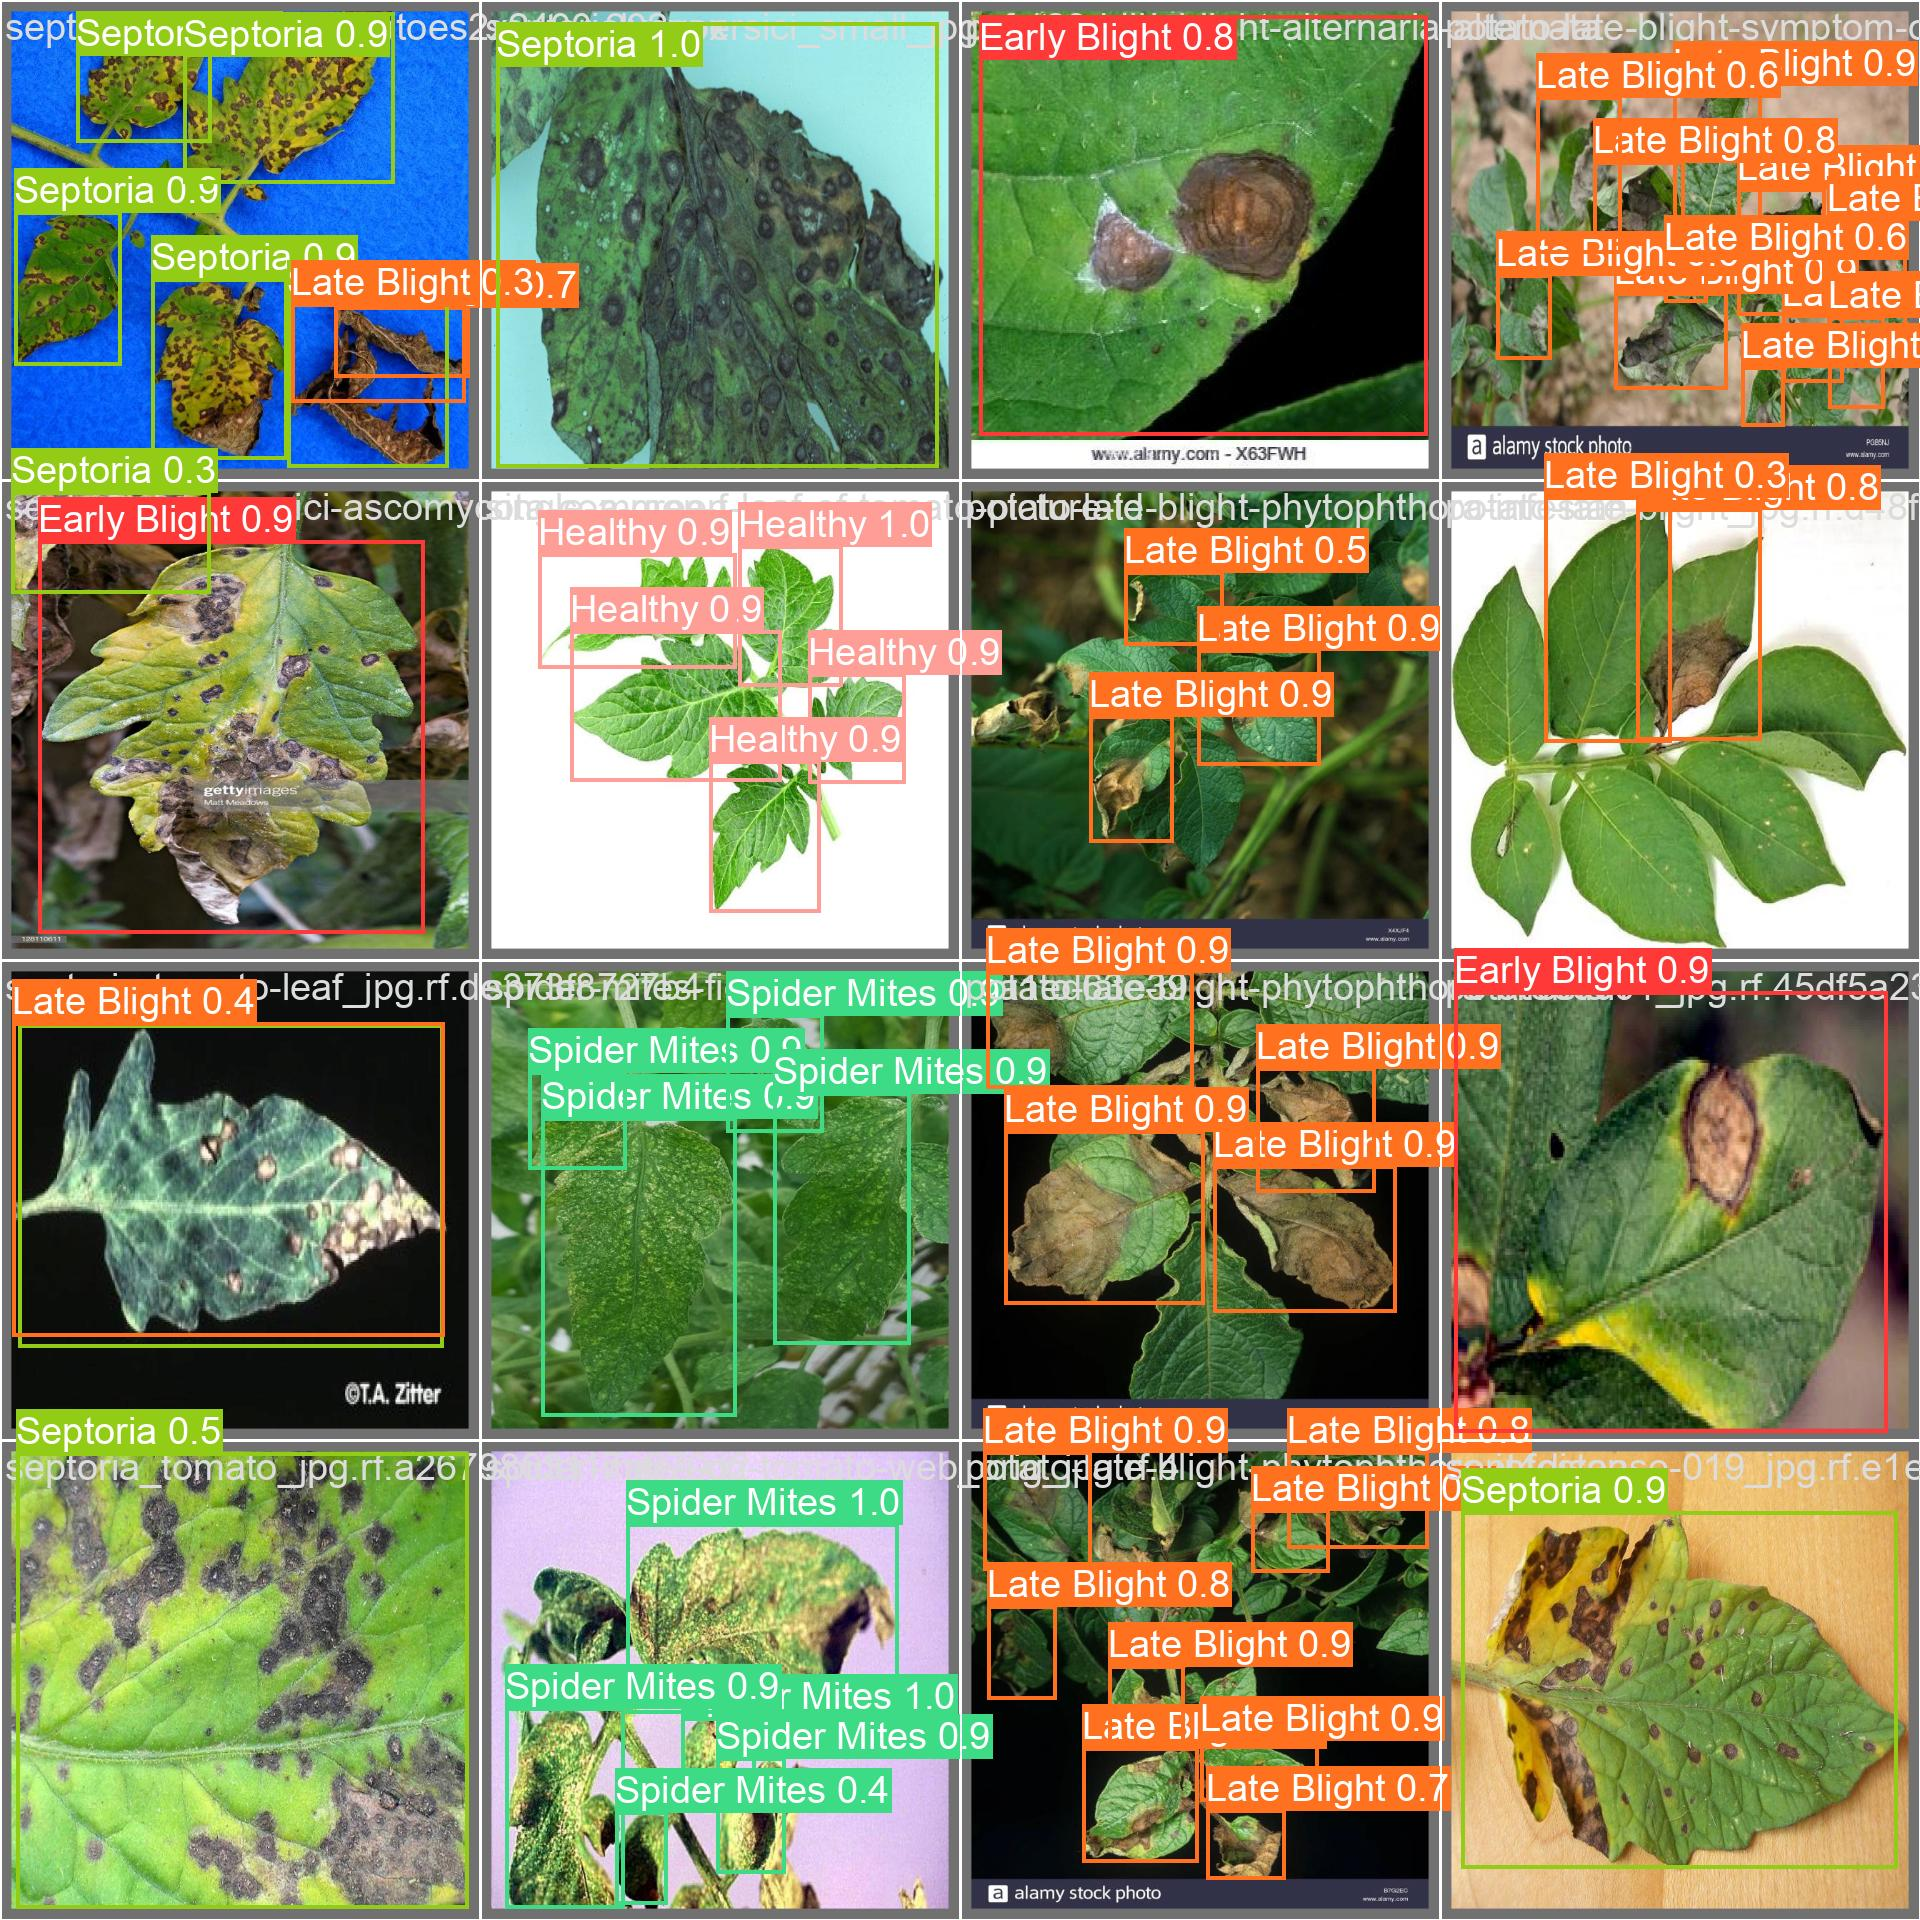

In [ ]:
Image(filename=f"{DATASET_FOLDER}/{RUNS_FOLDER}/{TRAIN_EXPERIMENT_NAME}/val_batch0_pred.jpg", width=600)

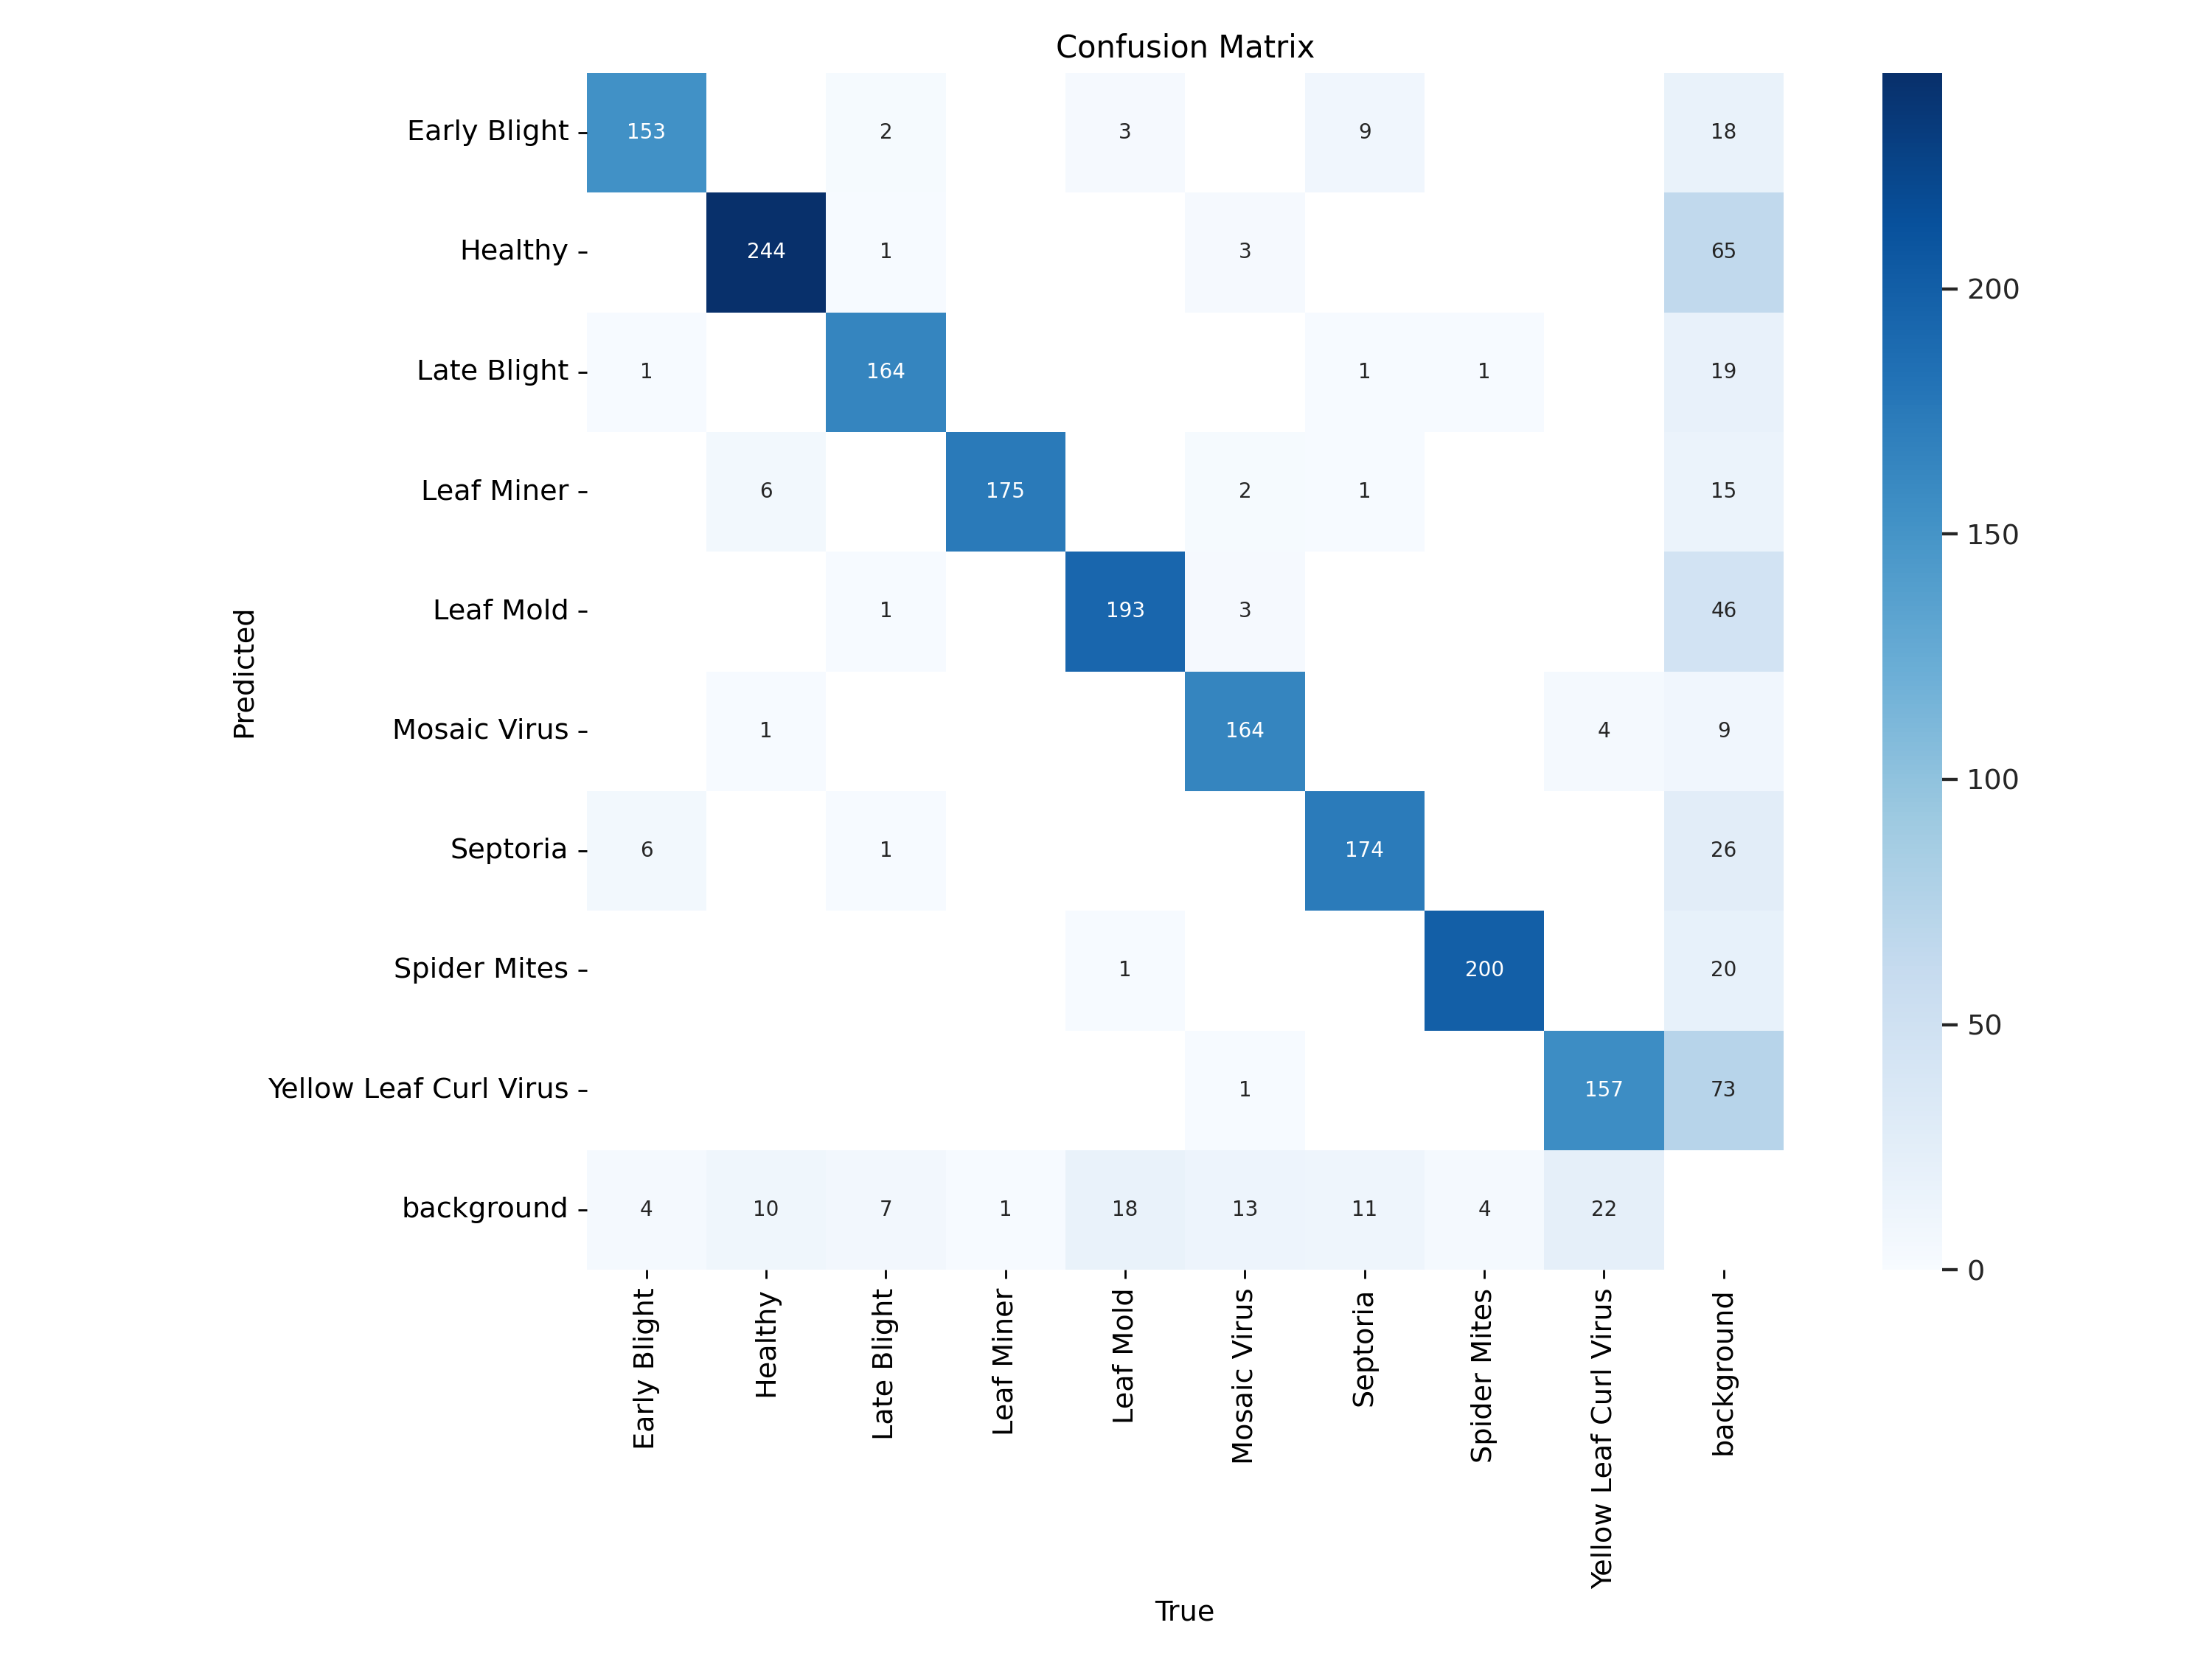

In [ ]:
Image(filename=f"{DATASET_FOLDER}/{RUNS_FOLDER}/{TRAIN_EXPERIMENT_NAME}/confusion_matrix.png", width=650)

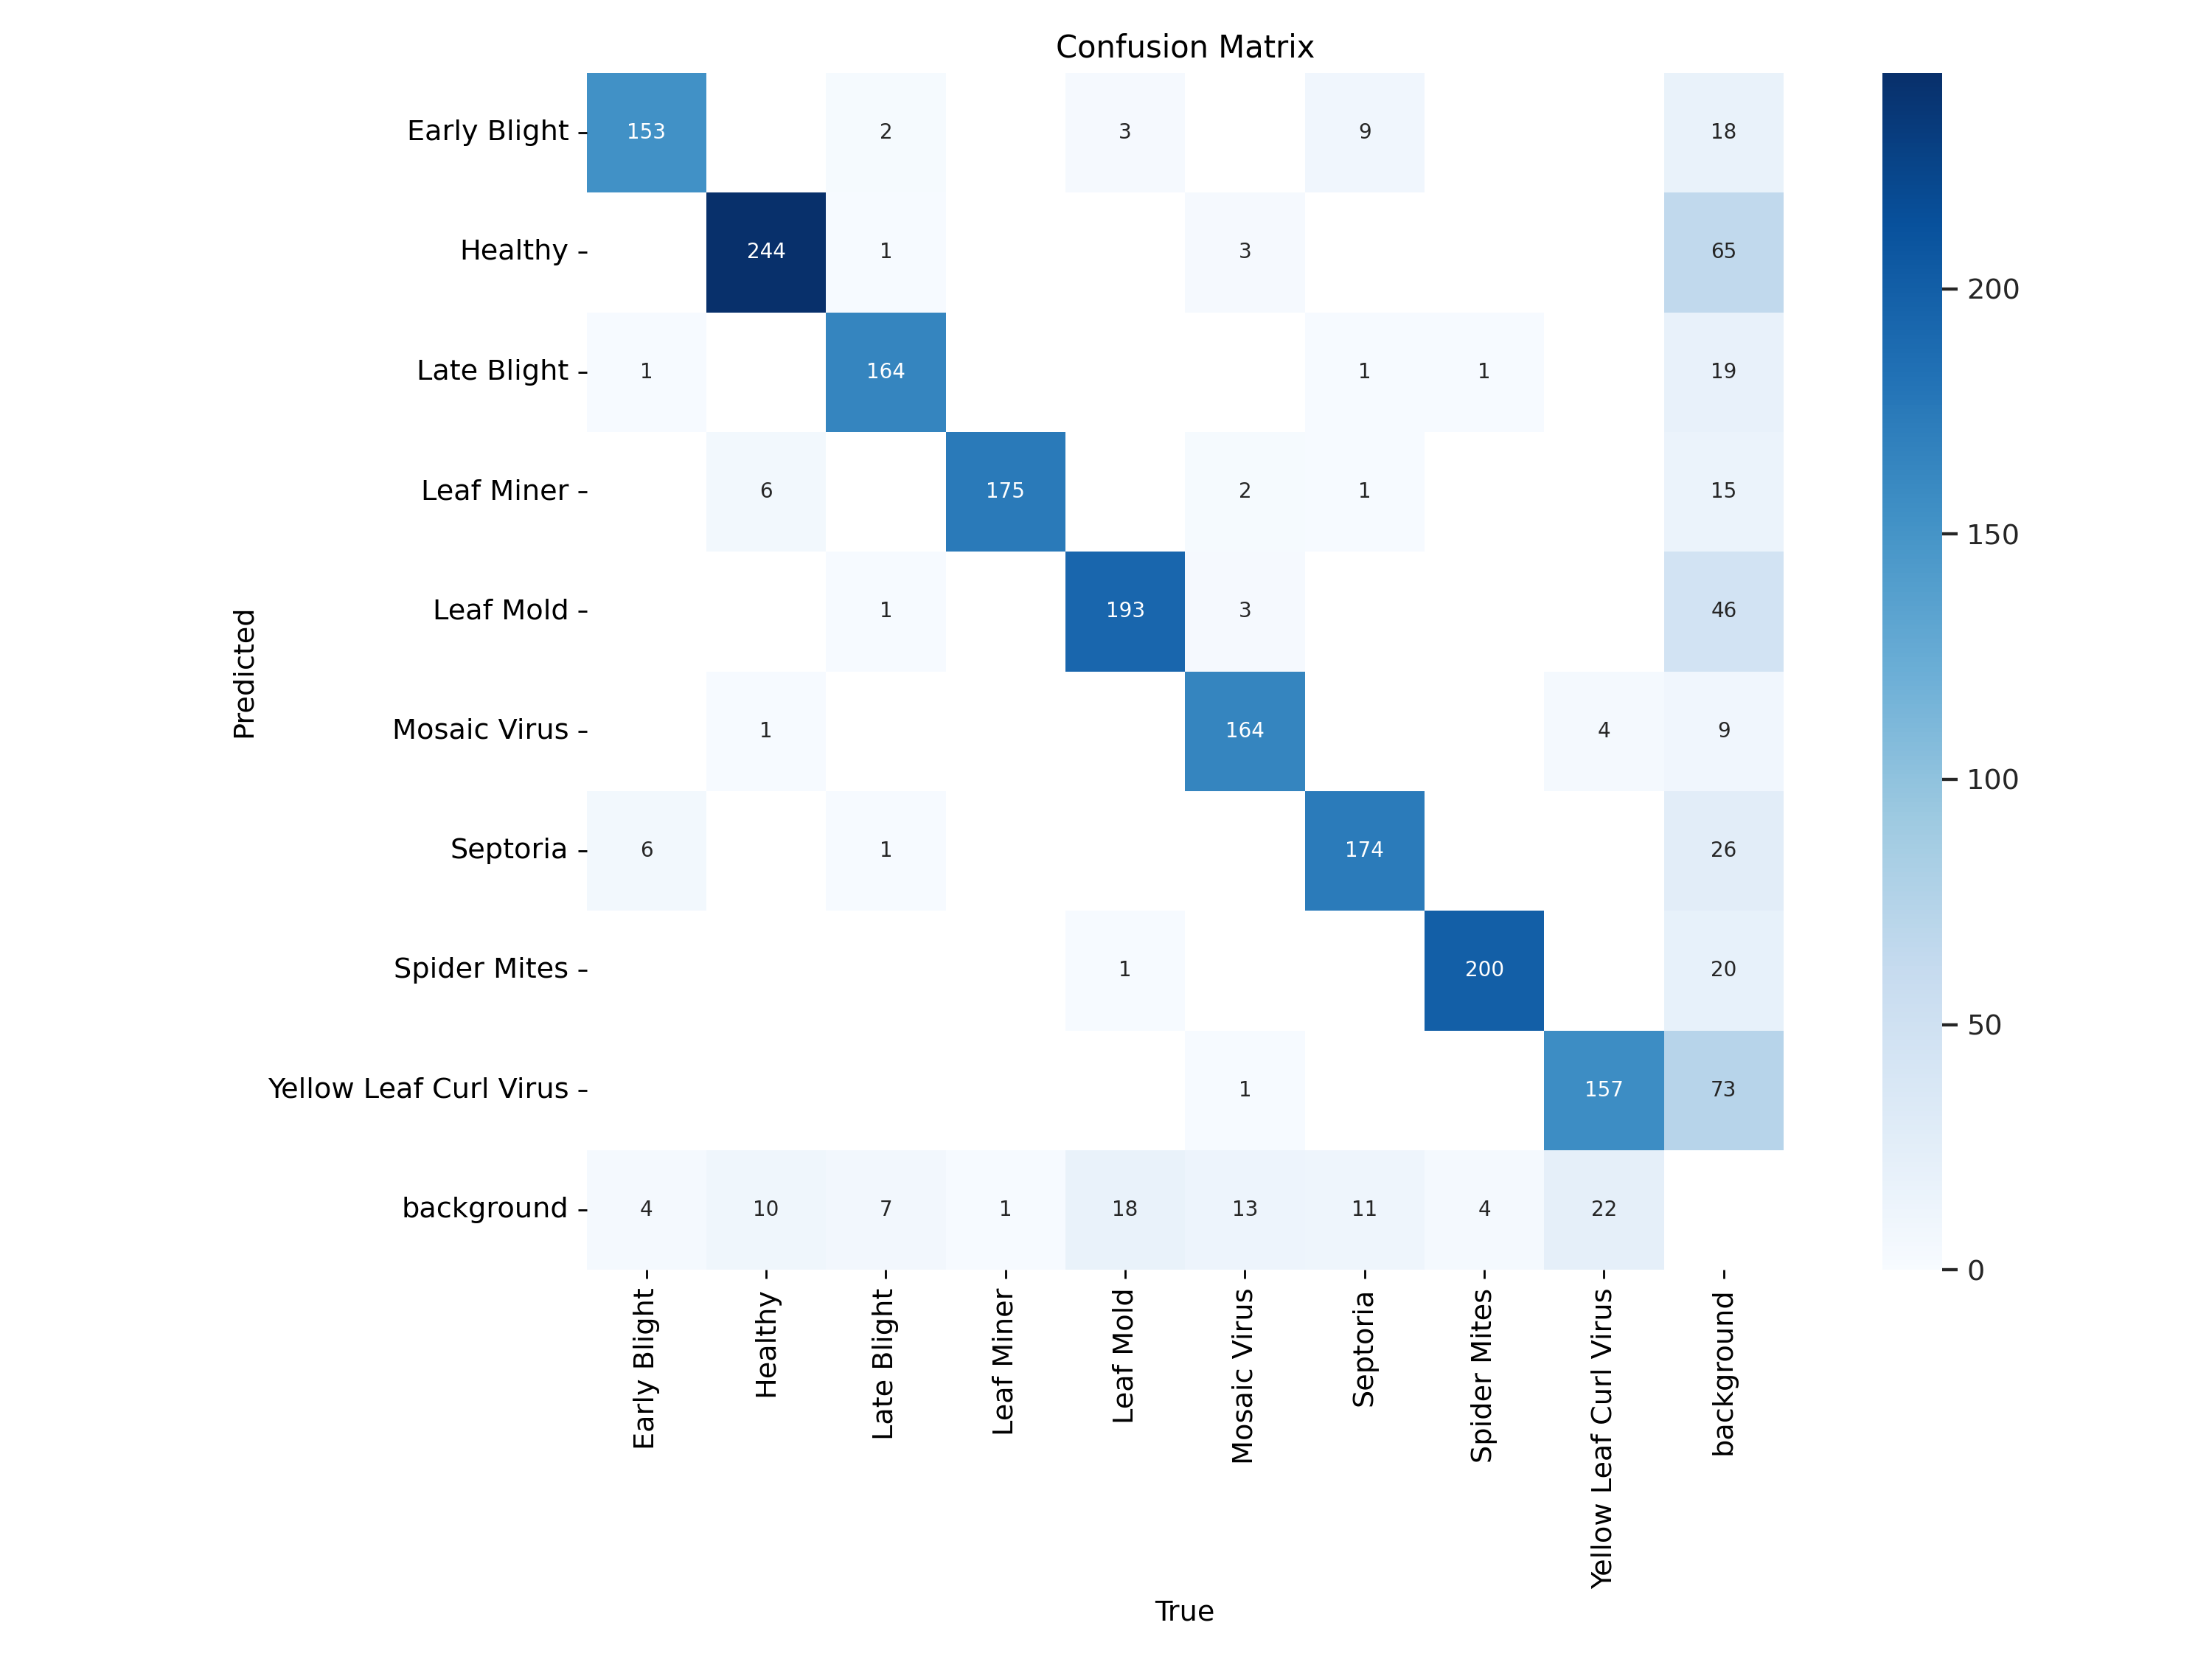

In [ ]:
Image(filename=f"{DATASET_FOLDER}/{RUNS_FOLDER}/{VAL_EXPERIMENT_NAME}/confusion_matrix.png", width=650)

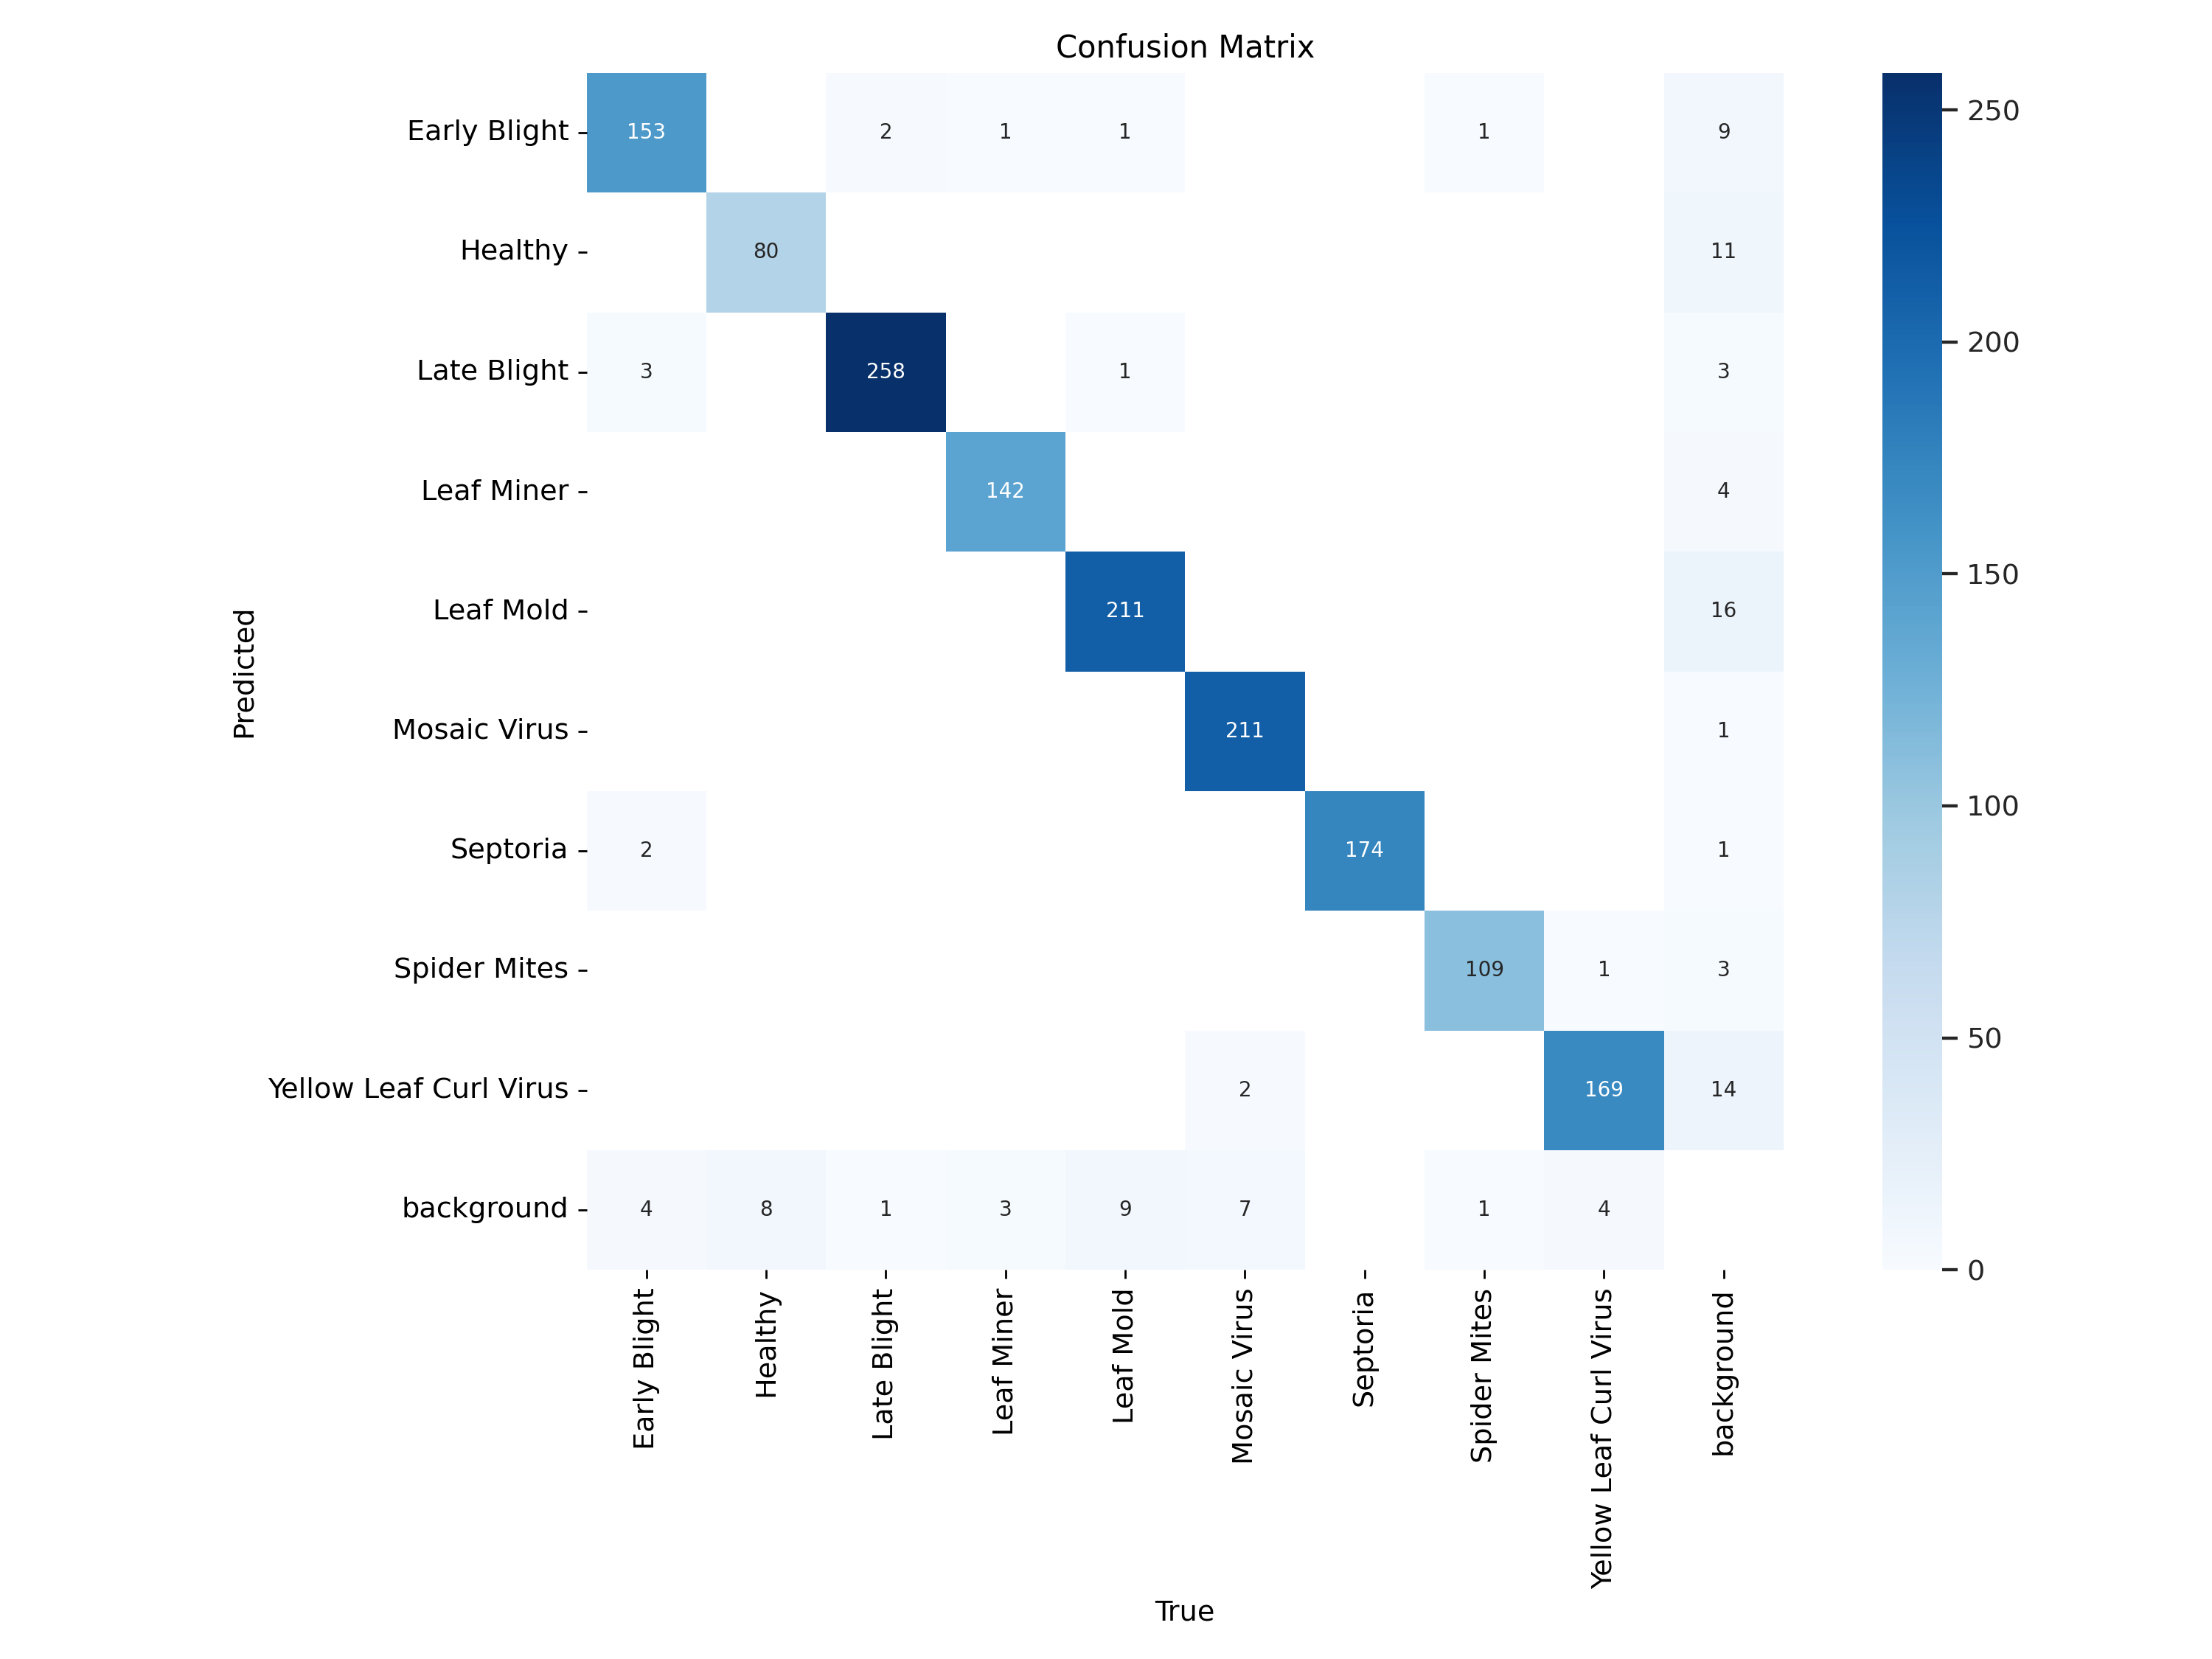

In [ ]:
Image(filename=f"{DATASET_FOLDER}/{RUNS_FOLDER}/{TEST_EXPERIMENT_NAME}/confusion_matrix.png", width=650)

### Inference

Make predictions with your previously trained model.

In [ ]:
import yaml

def get_value_from_yaml(yaml_file, key):
    with open(yaml_file, 'r') as file:
        data = yaml.safe_load(file)
        value = data.get(key, "")
        return value

parent_path = get_value_from_yaml(f"{DATASET_FOLDER}/data.yaml", "path")

train_path = get_value_from_yaml(f"{DATASET_FOLDER}/data.yaml", "train")
val_path = get_value_from_yaml(f"{DATASET_FOLDER}/data.yaml", "val")
test_path = get_value_from_yaml(f"{DATASET_FOLDER}/data.yaml", "test")

train_source = os.path.join(parent_path, train_path)
val_source = os.path.join(parent_path, val_path)
test_source = os.path.join(parent_path, test_path)

print("Retrieved pathes")
print(f"Train: {train_source}")
print(f"Val: {val_source}")
print(f"Test: {test_source}")

Retrieved pathes
Train: /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/train/images
Val: /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/valid/images
Test: /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/test/images


In [ ]:
%cd {DATASET_FOLDER}

!yolo task=detect mode=predict model="{TRAINED_MODEL_PATH}" conf=0.25 source="{train_source}" save=True project="{RUNS_FOLDER}" name="{INFERENCE_TRAIN_EXPERIMENT_NAME}"

/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1
Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs

image 1/3095 /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/train/images/02cb8c4e-4542-4020-bb46-025de54d97ae___PSU_CG-2098_JPG.rf.ae6e160c8755f70aeee0cfc1718e494d.jpg: 640x640 1 Mosaic Virus, 17.2ms
image 2/3095 /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/train/images/03b6acc7-41a6-4670-b47c-bef6d4baea18___PSU_CG-2363_JPG.rf.665244eaf813057548c3a2b409551265.jpg: 640x640 1 Mosaic Virus, 7.4ms
image 3/3095 /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/train/images/1-36_thumb_png.rf.d3934133989423f710ccc272a936993c.jpg: 640x640 4 Early Blights, 7.4ms
image 4/3095 /content/drive/MyDrive/tomato-disease-detection/da

In [ ]:
%cd {DATASET_FOLDER}

!yolo task=detect mode=predict model="{TRAINED_MODEL_PATH}" conf=0.25 source="{val_source}" save=True project="{RUNS_FOLDER}" name="{INFERENCE_VAL_EXPERIMENT_NAME}"

/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1
Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs

image 1/633 /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/valid/images/0_jpg.rf.cd9c593d8274d42dd4bfa4ed7542ac53.jpg: 640x640 3 Septorias, 12.1ms
image 2/633 /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/valid/images/11-40580_5_jpg.rf.9e2784a6d6e8565bedf6a0861b44cb14.jpg: 640x640 22 Yellow Leaf Curl Viruss, 7.6ms
image 3/633 /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/valid/images/110822-206-Tomato-blight_jpg.rf.b7f16150560ddbbd36d325855e17a9b2.jpg: 640x640 1 Late Blight, 7.3ms
image 4/633 /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/valid/images/1234080-Early-Blight_

In [ ]:
%cd {DATASET_FOLDER}

!yolo task=detect mode=predict model="{TRAINED_MODEL_PATH}" conf=0.25 source="{test_source}" save=True project="{RUNS_FOLDER}" name="{INFERENCE_TEST_EXPERIMENT_NAME}"

/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1
Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs

image 1/400 /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/test/images/039b47d574bc4bb8a14259a1cd96a741_jpg.rf.3959282d0bee6346eadee7cdec1a2f28.jpg: 640x640 1 Early Blight, 10.8ms
image 2/400 /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/test/images/151b36defa8ccfe2fd90f4a342affd5a-tobacco-mosaic-virus-the-two_jpg.rf.52501c48a7e5ffb7578649edc77f4853.jpg: 640x640 1 Mosaic Virus, 3 Yellow Leaf Curl Viruss, 8.3ms
image 3/400 /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/test/images/1c6727083428411181e9b58b4778c6b7_jpg.rf.4878feef05a28569e6be3994f505e220.jpg: 640x640 2 Leaf Miners, 8.2ms
image 4/400 /content/drive/My

**NOTE:** Let's take a look at few results.

In [ ]:
def display_detected(path_to_pred_dir, predictions_to_display=5, display_width=600):
  for image_path in glob.glob(f'{path_to_pred_dir}/*.jpg')[:predictions_to_display]:
      display(Image(filename=image_path, width=display_width))
      print("\n")

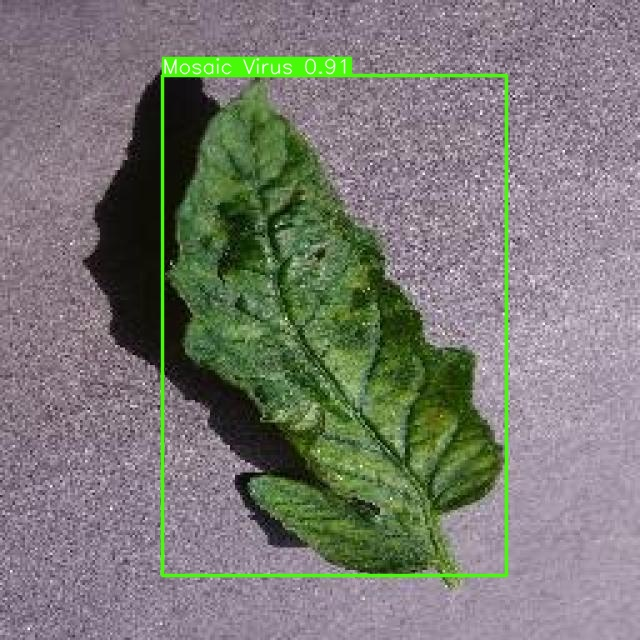

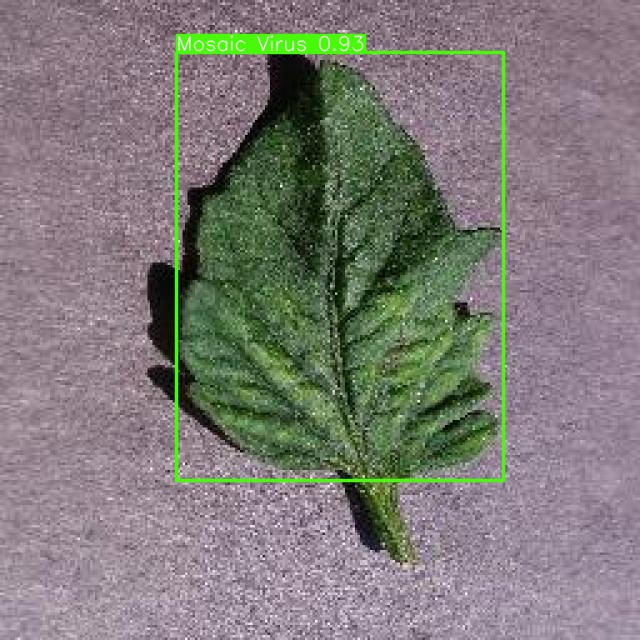

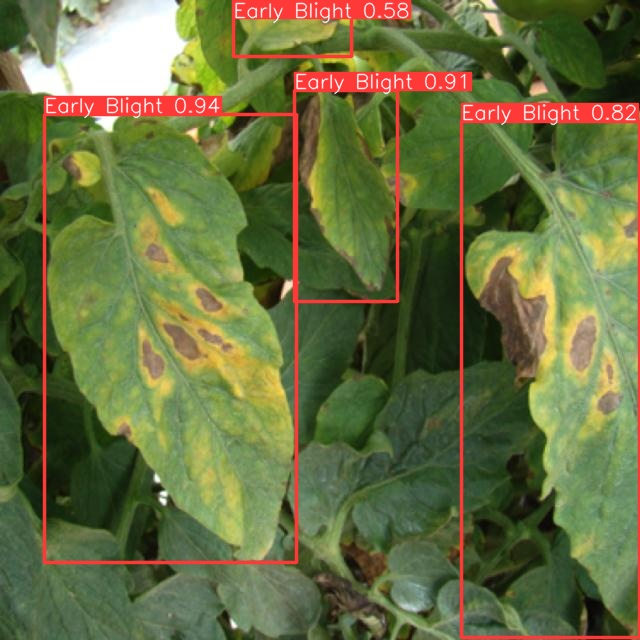

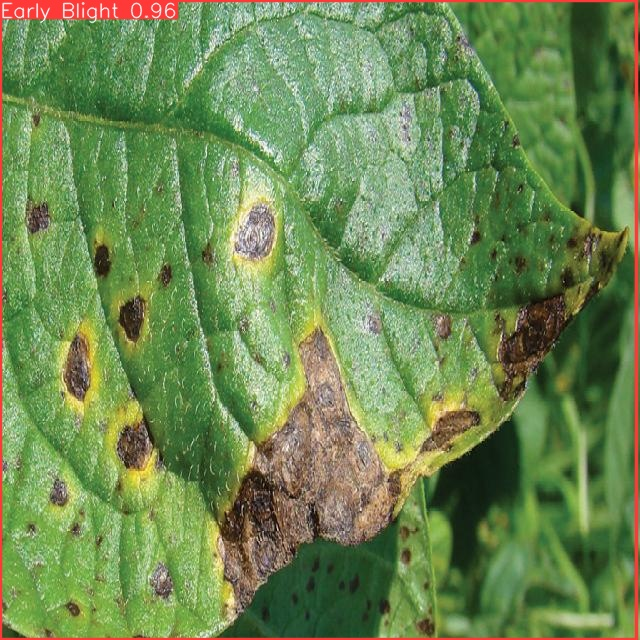

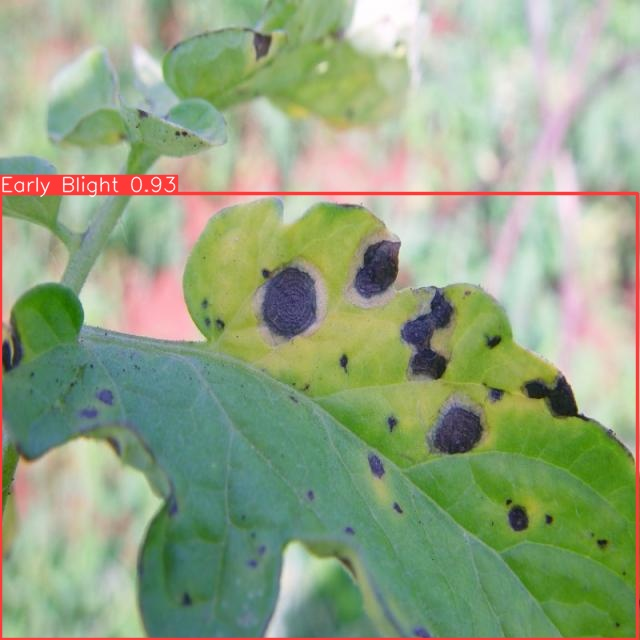

In [ ]:
display_detected(f"{TRAIN_PREDICTIONS_PATH}")

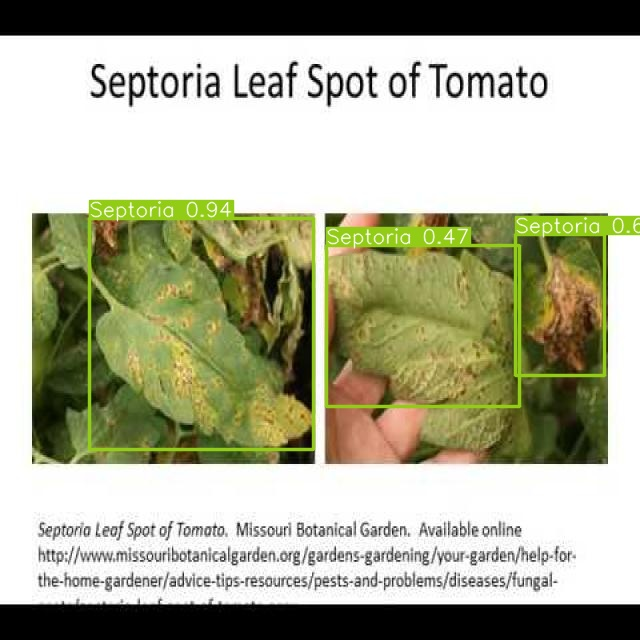

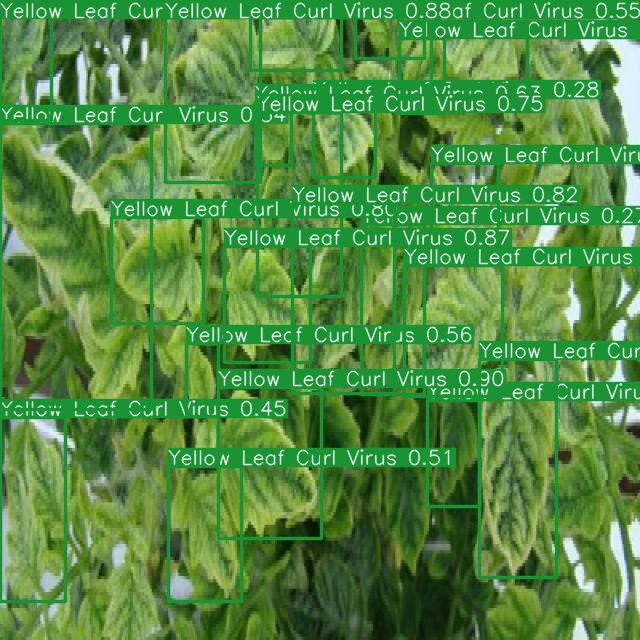

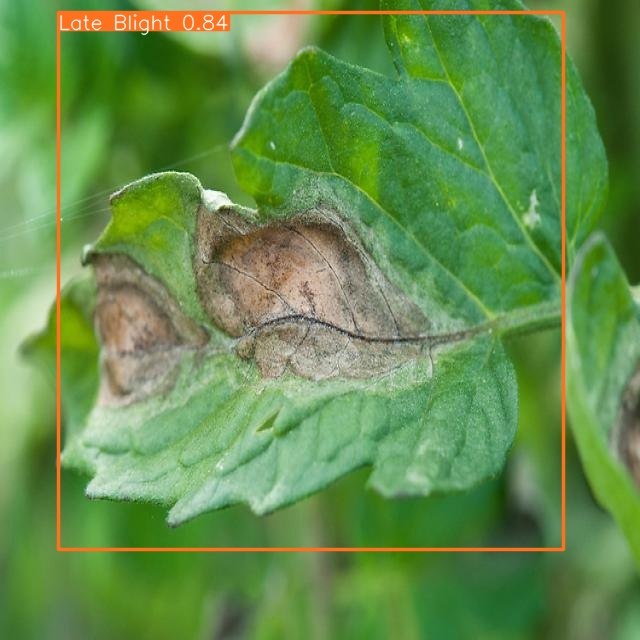

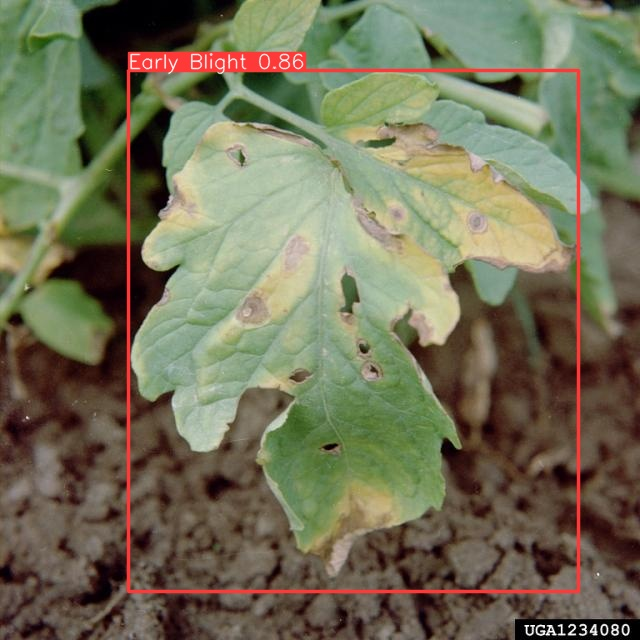

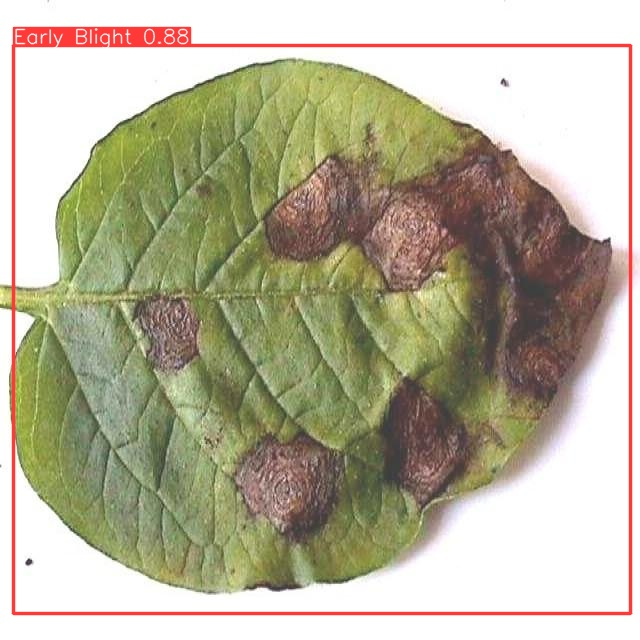

In [ ]:
display_detected(display_detected(f"{VAL_PREDICTIONS_PATH}"))

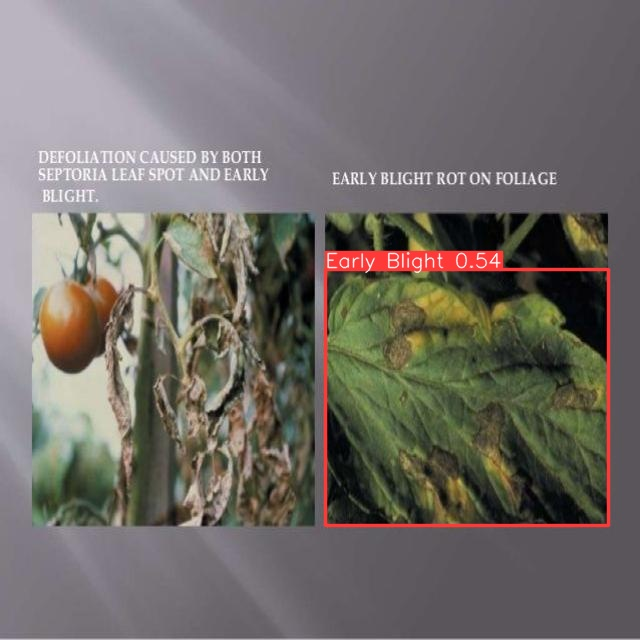

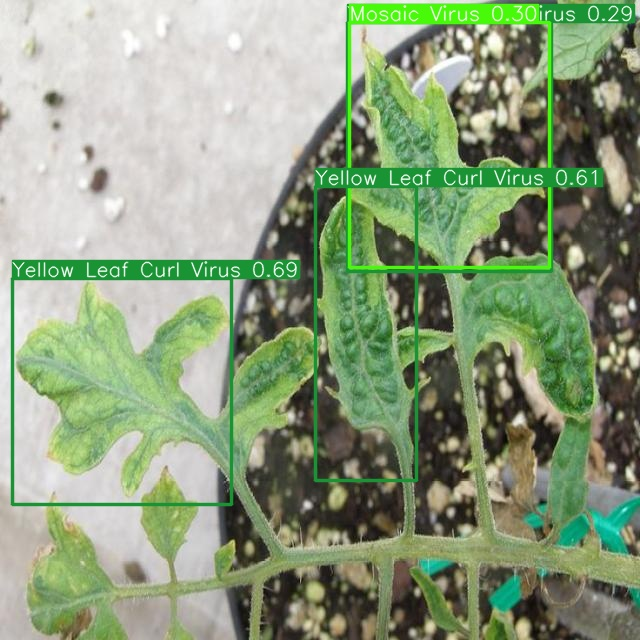

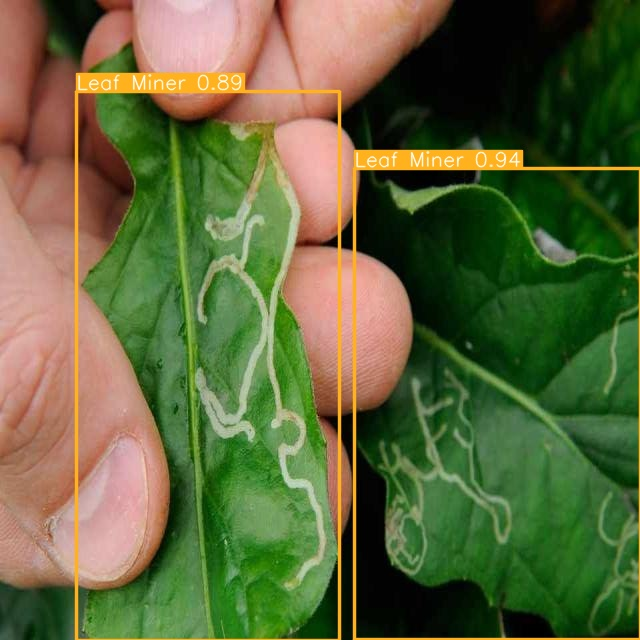

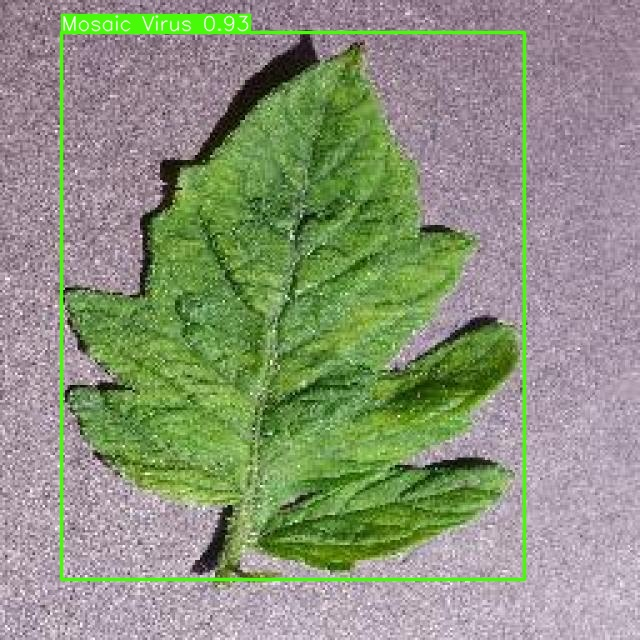

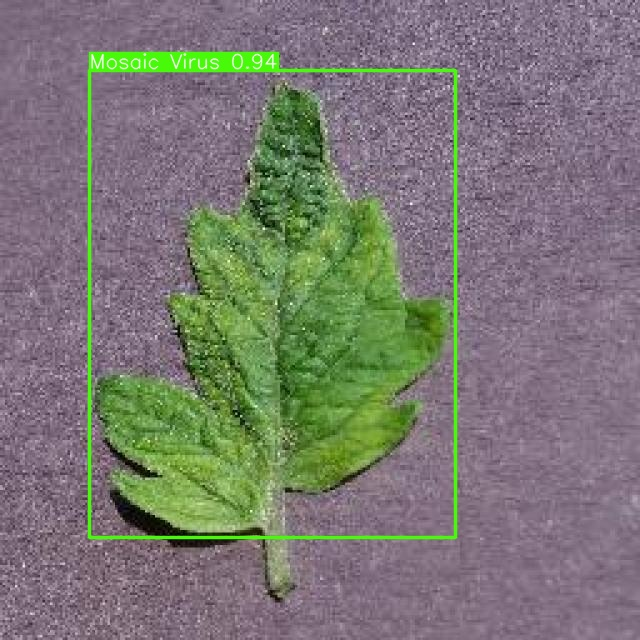

In [ ]:
display_detected(display_detected(f"{TEST_PREDICTIONS_PATH}"))

In [ ]:
%cd {DATASET_FOLDER}

!yolo export model="{TRAINED_MODEL_PATH}" imgsz="{IMAGE_SIZE}" format="{FORMAT}" project="{RUNS_FOLDER}" name="{EXPORT_EXPERIMENT_NAME}" opset=18

/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1
Ultralytics YOLOv8.1.30 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3007403 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/runs/tomato_diseases_detect/BASE_COCO_FullData_yolov8n_80_epochs/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 13, 8400) (6.0 MB)

ONNX: starting export with onnx 1.15.0 opset 18...
ONNX: export success ✅ 1.1s, saved as '/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/runs/tomato_diseases_detect/BASE_COCO_FullData_yolov8n_80_epochs/train/weights/best.onnx' (11.7 MB)

Export complete (3.1s)
Results saved to /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/runs/tomato_diseases_detect/BASE_COCO_FullData_yolov8n_80_

In [ ]:
# %cd {DATASET_FOLDER}

# !yolo export model="{TRAINED_MODEL_PATH}" imgsz="{IMAGE_SIZE}" format="{FORMAT}" project="{RUNS_FOLDER}" name="{EXPORT_EXPERIMENT_NAME}" opset=12

In [ ]:
# EXPORT_EXPERIMENT_NAME

In [ ]:
# RUNS_FOLDER

In [ ]:
# %cd {DATASET_FOLDER}
# onnx_path = "/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/runs/tomato_diseases_detect/BASE_COCO/train/weights/best.onnx"
# !yolo export model="{onnx_path}" imgsz="{IMAGE_SIZE}" format="tfjs"

### Predictions on exported model

In [ ]:
# # exported_and_trained_model_path = "/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/runs/tomato_diseases_detect/BASE_COCO/train/weights/best_opset12.onnx"
# exported_and_trained_model_path = "/content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/runs/tomato_diseases_detect/BASE_COCO_yolov8n/train/weights/best.pt"

In [ ]:
# %cd {DATASET_FOLDER}

# !yolo export model="{exported_and_trained_model_path}" format="{FORMAT}" project="{RUNS_FOLDER}" name="{EXPORT_EXPERIMENT_NAME}" opset=18

In [ ]:
# %cd {DATASET_FOLDER}

# !yolo task=detect mode=predict model="{exported_and_trained_model_path}" conf=0.25 source="{train_source}" save=True project="{RUNS_FOLDER}" name="{INFERENCE_TRAIN_EXPERIMENT_NAME}_{FORMAT}_model_cpu"

In [ ]:
# from ultralytics import YOLO

# # model = YOLO(exported_and_trained_model_path, task="detect")
# model = YOLO(TRAINED_MODEL_PATH)

In [ ]:
# model.info()

In [ ]:
# model = YOLO('yolov8n.pt')

In [ ]:
# import tensorflow

# tensorflow.__version__

### Additional steps(optional, comment them out when you finished)

In [ ]:
# !rm -r /content/drive/MyDrive/tomato-disease-detection/datasets/TomatoDiseaseDetectionEurope-1/runs/tomato_diseases_detect/BASE_COCO/train_predict